In [78]:
import random
import tensorflow as tf
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard

In [79]:
def Load_data(directory,IMG_SIZE):
    data = []
    CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"] #labels for each folder
    for category in CATEGORIES: 
        path = os.path.join(directory,category)  # create path to each folder
        class_label = CATEGORIES.index(category)  # get the classification  0,1,2,3,4,5,6,7,8,9 according to index
        for img in os.listdir(path):  # iterate over each image per folder
                image = cv2.imread(os.path.join(path,img))  #read image
                resized_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([resized_image, class_label])  #add this to our data array     
    random.shuffle(data) #shuffle data randomally to correctly train on different images
    trainX = []
    trainY = []
    for image,label in data: #seperate the data from the labels into two arrays
        trainX.append(image)
        trainY.append(label) 
    trainX = np.array(trainX).reshape((-1, IMG_SIZE, IMG_SIZE, 3))   #reshape training data with three channels (rgb)
    
    trainX = trainX.astype('float32')   # convert from integers to floats      
    trainX = trainX / 255.0             # normalize so that data ranges from 0 to 1 
    trainY = to_categorical(trainY,10)  # seperate labels into 10 different categories
    # Split the data into validation and training
    trainX, X_valid, trainY, Y_valid = train_test_split(trainX, trainY, test_size=0.2, shuffle= True)   
    return trainX, X_valid, trainY, Y_valid 
        

In [80]:
def Train(images_array,label_array,IMG_SIZE,X_valid, Y_valid):
    NAME = "Digits-CNN-28x28"
    tensorboard = TensorBoard(log_dir="logs\\fit\\".format(NAME))
    model = Sequential()
    # input layer 
    # 32 filters with 3x3 kernel, He weight initialization, input shape according to image size 28x28 and 3 channels  
    # output 32x26x26
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    # hidden layer   
    # Pooling to down sample the input data 
    # output 32x13x13
    model.add(MaxPooling2D((2, 2))) 
    # hidden layer    
    # Flatten data to convert it to 1D array for the fully connected layer
    # output 5408
    model.add(Flatten())  
    # hidden layer 
    # output 100 nodes 
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    # output layer
    # softmax function for categorical classification 
    # output 10 nodes 
    model.add(Dense(10, activation='softmax'))    
   
    # compile model
    model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(images_array, label_array, epochs=5, batch_size=32,validation_data=(X_valid, Y_valid),callbacks=[tensorboard])
    return model

In [81]:
directory = "C:/Users/sarak/JuypNotebooks/CNN/trainingSet"
images_array, X_valid, label_array, Y_valid= Load_data(directory,28)

In [ ]:
model = Train(images_array,label_array,28,X_valid, Y_valid)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
14528/33600 [===========>..................] - ETA: 16s - loss: 0.2484 - accuracy: 0.9230

In [77]:
model.summary()
model.save('cnn.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 542,806
Trainable params: 542,806
Non-trainable params: 0
_________________________________________________________________


In [7]:
def PredictImage(i):
    img = X_valid[i]
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap = 'gray',interpolation='nearest')
    img_array = cv2.resize(img, (28, 28))
    img_array = np.expand_dims(img_array, axis=(0))
    predictions = model.predict_classes(img_array)
    print("Prediction output:",predictions)
    print("Label:",Y_valid[i])

Prediction output: [1]
Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


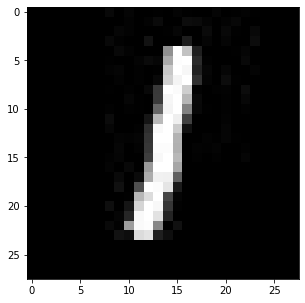

In [8]:
PredictImage(11)

Prediction output: [4]
Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


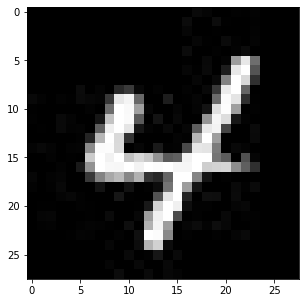

In [9]:
PredictImage(9)

Prediction output: [8]
Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


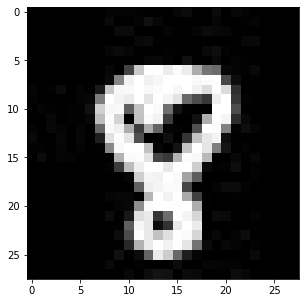

In [11]:
PredictImage(12)